In [1]:
%matplotlib inline
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import glob

In [4]:
flist = glob.glob("flat_spectrum_5-19_*_axespc_SPC.fits")
flist.sort()
flist

['flat_spectrum_5-19_0_axespc_SPC.fits',
 'flat_spectrum_5-19_1_axespc_SPC.fits',
 'flat_spectrum_5-19_2_axespc_SPC.fits',
 'flat_spectrum_5-19_3_axespc_SPC.fits',
 'flat_spectrum_5-19_4_axespc_SPC.fits',
 'flat_spectrum_5-19_5_axespc_SPC.fits',
 'flat_spectrum_5-19_6_axespc_SPC.fits',
 'flat_spectrum_5-19_7_axespc_SPC.fits',
 'flat_spectrum_5-19_8_axespc_SPC.fits',
 'flat_spectrum_5-19_9_axespc_SPC.fits']

1.80354643622e-35
-5.15298981776e-36
7.72948472664e-36
-5.15298981776e-36
-2.0611959271e-35
-5.15298981776e-36
-3.2206186361e-36
2.57649490888e-36
-5.15298981776e-36
0.0


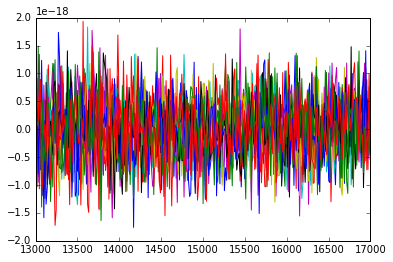

In [18]:
noise = []
for fname in flist:
    spec = fits.getdata(fname)
    wave = spec.field("wave")
    flux = spec.field("flux")
    mask = (wave > 13000) & (wave < 17000)
    wave = wave[mask]
    flux = flux[mask]
    flux -= np.mean(flux)
    #plt.figure()
    plt.plot(wave, flux)
    noise.append(flux)
    print(np.mean(flux))
    #n = len(flux)
    #variance = flux.var()
    #x = flux-flux.mean()
    #r = np.correlate(x, x, mode = 'full')[-n:]
    #assert N.allclose(r, N.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    #result = r/(variance*(np.arange(n, 0, -1)))
    #plt.figure()
    #plt.plot(wave, result)

In [19]:
noise = np.array(noise)

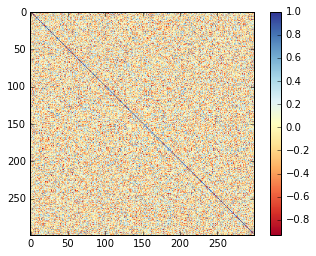

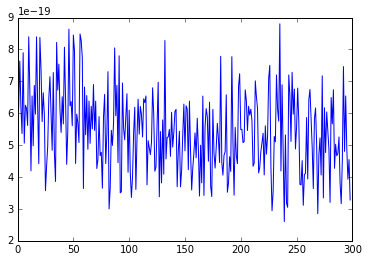

In [43]:
plt.imshow(np.corrcoef(noise.T), cmap=plt.cm.RdYlBu)
plt.colorbar()
plt.figure()
plt.plot(np.sqrt(np.diag(np.cov(noise.T))))

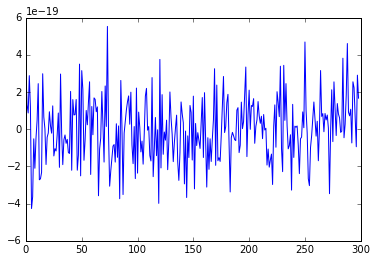

In [39]:
plt.plot(np.mean(noise, axis=0))

In [61]:
np.save("tips_noise_copies.npy", np.array([wave, noise]))

In [62]:
np.load("tips_noise_copies.npy")

array([[ -7.41989452e-20,   6.99733993e-19,  -8.47403346e-19, ...,
         -4.31336625e-19,   5.25884962e-19,   3.86590654e-19],
       [ -3.20671470e-19,  -1.03477457e-18,   1.48811796e-18, ...,
          4.60910234e-20,   3.52808550e-19,   1.66956865e-19],
       [ -6.29700533e-19,   6.32840691e-19,   5.96574726e-19, ...,
         -7.21518934e-19,   7.56107380e-19,   3.37963085e-19],
       ..., 
       [  7.39391466e-19,   4.05482242e-19,  -7.96318660e-19, ...,
          3.11079451e-19,   4.31973223e-19,  -5.44106539e-19],
       [  5.04001190e-19,   6.30649576e-20,   1.22483332e-19, ...,
         -1.01292568e-19,  -4.63798678e-19,   5.68039695e-19],
       [  8.54421875e-19,   9.13283324e-19,   1.39245194e-19, ...,
         -2.45097611e-19,   9.90992863e-19,   2.28917108e-19]])

# 2018-03-14 Checking noise again

In [29]:
hdu = fits.getdata("/Users/brunomor/Work/Dedale/data/euclid_simulations/2017-02-10_euclid_dedale_meeting_run/2017-02-10_TIPS_results/2017-02-14_euclid_noise_sim_tests/flat_spectrum_1-18_noise_wide.fits")

(-10, 10)

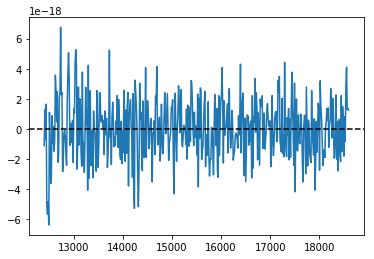

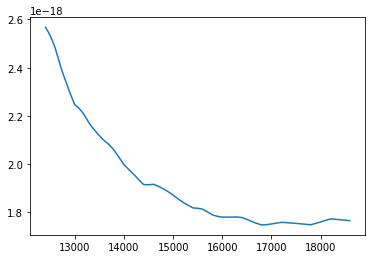

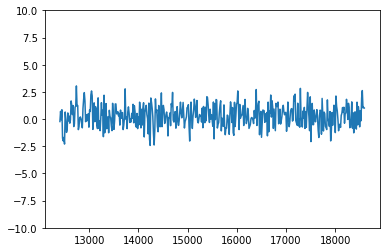

In [37]:
plt.plot(hdu["wave"], hdu["flux"] - 0.537e-18)
plt.axhline(color="k", ls="--")
plt.figure()
plt.plot(hdu["wave"], hdu["error"])

plt.figure()
plt.plot(hdu["wave"], hdu["flux"]/(hdu["error"]))
plt.ylim(-10, 10)

In [17]:
np.mean(hdu["flux"] - 0.537e-18)

3.7281359869005872e-22

In [22]:
df_noise_example = fits.getdata("/Users/brunomor/src/ISAP_V3.1/idl/COSMO/Galaxies/Darth_Fader/df_data/errorcurve.fits.gz")

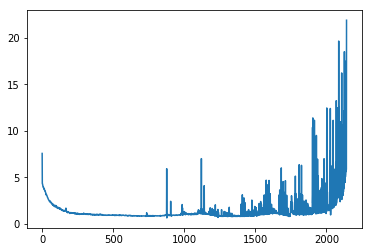

In [24]:
plt.plot(df_noise_example)

In [38]:
errorcurve = hdu["error"]

In [40]:
errors = np.tile(errorcurve, (4, 1)).T

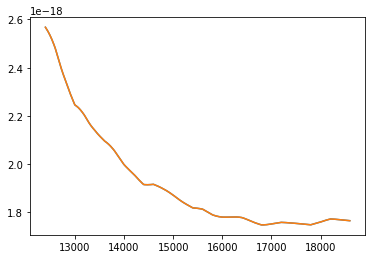

In [42]:
plt.plot(hdu["wave"], errors[:, 0])
plt.plot(hdu["wave"], errors[:, 1])